In [116]:
import math
import statistics
from scipy import stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.descriptivestats import sign_test
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# хи-квадрат распределение k=15 (df=15, loc=0(по умолчанию), scale=1(по умолчанию))
x_1 = sps.chi2.rvs(df=15, size=100)

# равномерное a=5, b=25 (loc=a, scale=b-a)
x_2 = sps.uniform.rvs(size=100, loc=5, scale=20) 

# выведем по 10 первых значений 1-й и 2-й выборки
print(x_1[:10])
print()
print(x_2[:10])

[ 9.75563432 10.78851675 10.63659057  8.7104911  17.94424061 15.42216435
 17.40717547 15.52320776 14.16027296 13.4082894 ]

[18.19444834 22.18907455 17.68595202  9.02584658  5.07647986 18.01505671
 22.98339859 10.69212659 15.84798376 18.40987379]


Формулы расчета статистических характеристик:

для $ X^2(k) $: 

* $ m_i = k  $

* $ D_i = 2k  $

In [118]:
m_1 = 15
sigma_1 = math.sqrt(30)

print('m_1: {:f}'.format(m_1))
print('sigma_1: {:f}'.format(sigma_1))

m_1: 15.000000
sigma_1: 5.477226


**Задание 1**

In [119]:
# среднее
mean_1 = x_1.mean()

print('mean_1: {:f}'.format(mean_1))
print()

# оценка дисперсии
var_1 = x_1.var()

print('var_1: {:f}'.format(var_1))
print()

# оценка стандартного отклонения
std_1 = x_1.std()

print('std_1: {:f}'.format(std_1))

mean_1: 14.150636

var_1: 23.027153

std_1: 4.798662


**Задание 2**

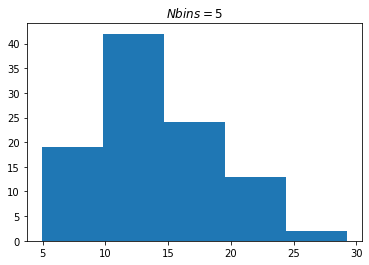

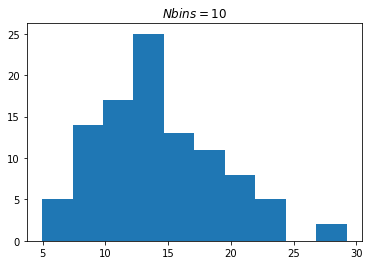

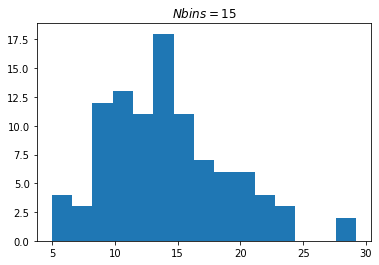

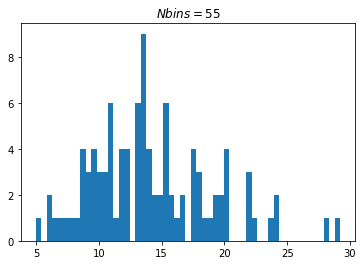

In [120]:
# гистограммы для 1-го распределения

# bins = 5
plt.hist(x_1, bins=5)
# x_axis = np.arange(x_1.min(), x_1.max(), 0.00001)
# plt.plot(x_axis, sps.uniform.pdf(x_axis))
plt.title('$Nbins = 5$')
plt.show()

# bins = 10
plt.hist(x_1, bins=10)
plt.title('$Nbins = 10$')
plt.show()

# bins = 15
plt.hist(x_1, bins=15)
plt.title('$Nbins = 15$')
plt.show()

# bins = 55
plt.hist(x_1, bins=55)
plt.title('$Nbins = 55$')
plt.show()

**Задание 3**

In [121]:
def mean(a):
    b = [0]*(len(a) - 1)
    for i in range(0, len(a)-1):
        b[i] = ((a[i+1] + a[i]) / 2)
    return b

def getM(mean, frequencies, n):
    m = 0
    for i in range(0, len(mean)):
        m += mean[i] * frequencies[i] 
    return m/n

def getSigma(mean, frequencies, m, n):
    s = 0
    for i in range(0, len(mean)):
        s += (mean[i] - m)**2 * frequencies[i]
    return (s / (n - 1))**(1/2)

def getNP(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = sps.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx += (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx += freq[i]
    if (npx >= 5):
      n.append(nx)
      np.append(npx)
      nx = 0
      npx = 0
    elif (npx < 5) and (i == len(val) - 2):
      n[len(n) - 1] = nx + n[len(n) - 1]
      np[len(np) - 1] = npx + np[len(np) - 1]    
  return (n, np)

def getNP_no_merge(val, freq, n1, m, sigma):
  n  = list()
  np = list()
  npx = 0
  nx = 0
  distr = sps.norm(loc = m, scale = sigma)
  for i in range(0, len(val) - 1):
    npx = (distr.cdf(val[i + 1]) - distr.cdf(val[i])) * n1
    nx = freq[i]
    n.append(nx)
    np.append(npx)
     
  return (n, np) 
    
def getZ(n, np):
    z = 0
    for i in range(0, len(n)):
        z += (n[i] - np[i])**2 / np[i]
    return z

Number of grouping intervals 5
chi-squared criteria for N: z = 3.847; p-value = 0.292
Number of grouping intervals 10
chi-squared criteria for N: z = 14.719; p-value = 0.080
Number of grouping intervals 15
chi-squared criteria for N: z = 30.407; p-value = 0.005
Number of grouping intervals 55
chi-squared criteria for N: z = 101.515; p-value = 0.000


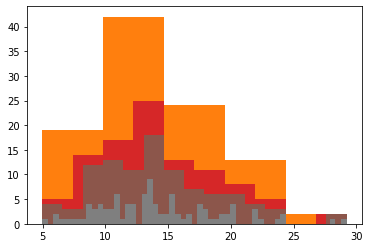

In [122]:
for bin in [5,10,15,55]:
  frequencies_5 = plt.hist(x_1, bin)[0]
  values_5 = plt.hist(x_1, bin)[1]


  m = getM(mean(values_5), frequencies_5, 100)
  sigma = getSigma(mean(values_5), frequencies_5, m, 100)
  new_n, new_np = getNP_no_merge(values_5, frequencies_5 , 100, m, sigma)

  z = getZ(new_n, new_np)
  k = len(new_n)
  r = 2

  f_z_chi = sps.chi2.cdf(z, k - r - 1)
  p_value = 2 * min(f_z_chi, 1 - f_z_chi)

  print("Number of grouping intervals %d" % bin)
  print("chi-squared criteria for N: z = %.3f; p-value = %.3f" % (z, p_value))

In [123]:
def getNP_R(val, freq, n1, a, b):
    n  = list()
    np = list()
    npx = 0
    nx = 0
    dis = sps.uniform(loc = a, scale = b - a)
    for i in range(0, len(val) - 1):
        npx += (dis.cdf(val[i + 1]) - dis.cdf(val[i])) * n1
        nx += freq[i]
        if npx > 5:
            n.append(nx)
            np.append(npx)
            nx = 0
            npx = 0
        elif (npx < 5) and (i == len(val) - 2):
            n[len(n) - 1] = nx + n[len(n) - 1]
            np[len(np) - 1] = npx + np[len(np) - 1]
    return (n, np)

Number of grouping intervals 5
chi-squared criteria for R: z = 195.281; p-value = 0.000
Number of grouping intervals 10
chi-squared criteria for R: z = 195.174; p-value = 0.000
Number of grouping intervals 15
chi-squared criteria for R: z = 213.148; p-value = 0.000
Number of grouping intervals 55
chi-squared criteria for R: z = 207.699; p-value = 0.000


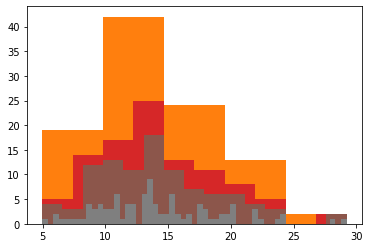

In [124]:
for bin in [5,10,15,55]:

  frequencies_5 = plt.hist(x_1, bin)[0]
  values_5 = plt.hist(x_1, bin)[1]

  m = getM(mean(values_5), frequencies_5, 100 ) 
  sigma = getSigma(mean(values_5), frequencies_5, m, 100 )
  a = 1/2 * (2*m - sigma * (12)**(1/2))
  b = 1/2 * (2*m + sigma * (12)**(1/2))

  new_n, new_np = getNP(values_5, frequencies_5 , 100, a, b)

  z = getZ(new_n, new_np)
  k = len(new_n)
  r = 2

  f_z_chi = sps.chi2.cdf(z, k - r - 1)
  p_value = 2 * min(f_z_chi, 1 - f_z_chi)

  print("Number of grouping intervals %d" % bin)
  print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))

In [125]:
def getNP(val, freq, n1):
    n  = list()
    np = list()
    npx = 0
    nx = 0
    dis = sps.chi2(5)
    for i in range(0, len(val) - 1):
        npx += (dis.cdf(val[i + 1]) - dis.cdf(val[i])) * n1
        nx += freq[i]
        if npx > 5:
            n.append(nx)
            np.append(npx)
            nx = 0
            npx = 0
        elif (npx < 5) and (i == len(val) - 2):
            n[len(n) - 1] = nx + n[len(n) - 1]
            np[len(np) - 1] = npx + np[len(np) - 1]
    return (n, np)

Number of grouping intervals 5
chi-squared criteria for R: z = 666.901; p-value = 0.000
Критическое значение: 3.841
Number of grouping intervals 10
chi-squared criteria for R: z = 674.787; p-value = 0.000
Критическое значение: 5.991
Number of grouping intervals 15
chi-squared criteria for R: z = 680.228; p-value = 0.000
Критическое значение: 7.815
Number of grouping intervals 55
chi-squared criteria for R: z = 615.754; p-value = 0.000
Критическое значение: 11.070


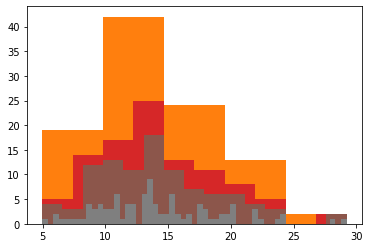

In [144]:
for bin in [5,10,15,55]:

  frequencies_5 = plt.hist(x_1, bin)[0]
  values_5 = plt.hist(x_1, bin)[1]

  new_n, new_np = getNP(values_5, frequencies_5 , 100)

  z = getZ(new_n, new_np)
  k = len(new_n)
  r = 0

  f_z_chi = sps.chi2.cdf(z, k - r - 1)
  p_value = 2 * min(f_z_chi, 1 - f_z_chi)

  print("Number of grouping intervals %d" % bin)
  print("chi-squared criteria for R: z = %.3f; p-value = %.3f" % (z, p_value))
  print('Критическое значение: %.3f' % (sps.chi2(k-r-1).ppf(1 - 0.05)))

**Задание 4**

In [160]:
alpha = 0.05
m = x_1.mean()
sigma = x_1.std()
a = 1/2 * (2*m - sigma * (12)**(1/2))
b = 1/2 * (2*m + sigma * (12)**(1/2))
test_N = sps.kstest(x_1, sps.norm(m, sigma).cdf)
test_R = sps.kstest(x_1, sps.uniform(a, b - a).cdf)
test_chi = sps.kstest(x_1, sps.chi2(5).cdf)

print('Нормальное распределение: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_N[0] , p_value = test_N[1]))
print('Равномерное распределение: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_R[0] , p_value = test_R[1]))
print('Распределение хи-квадрат: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =test_chi[0] , p_value = test_chi[1]))

Нормальное распределение: z = 0.093, p-value = 0.326
Равномерное распределение: z = 0.112, p-value = 0.150
Распределение хи-квадрат: z = 0.794, p-value = 0.000


In [156]:
stat_u, p_value_u = sps.kstest(x_1, 'uniform', args=(a,b-a), alternative='two-sided')
print(stat_u, p_value_u) 

0.1677379158614365 0.006283937571137807


In [157]:
stat_n, p_value_n = sps.kstest(x_1, 'norm', args=(m, sigma), alternative='two-sided')
print(stat_n, p_value_n) 

0.09393363135192467 0.32051315585935675


Normal:
Z: 0.09349420356012017, P: 0.3258728427990727


Uniform:
Z: 0.11208030185253381, P: 0.15016672700506925


Chi-2:
Z: 0.7941438588590355, P: 4.903529972331366e-68


Chi-2 (true distribution):
Z: 0.10828720546528536, P: 0.17799277506836558




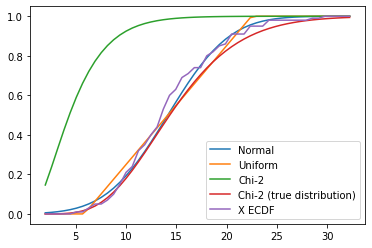

In [128]:
def plot_func(f, ls, **t):
	return plt.plot(ls, list(map(f, ls)), **t)
 
def get_emp(x):
	x_v = sorted(x)

	def f(t):
		if t < x_v[0]:
			return 0
		for i in range(len(x_v)):
			if i == len(x_v) - 1:
				return 1
			if x_v[i] <= t < x_v[i+1]:
				return (i+1) / len(x_v)
	return f

linspace = np.linspace(min(np.min(x_1), np.min(x_2)) - 3, max(np.max(x_1), np.max(x_2)) + 3)
 
def kolmogorov_fitness(g):
	Z, P = sps.kstest(x_1, g.cdf)

	print(f'Z: {Z}, P: {P}')

for name, g in [('Normal', sps.norm(np.mean(x_1), np.std(x_1))),
				('Uniform', sps.uniform(a, b - a)),
				('Chi-2', sps.chi2(5)),
				('Chi-2 (true distribution)', sps.chi2(15))]:
	print(name + ':')
	kolmogorov_fitness(g)
	print()
	print()

	plot_func(g.cdf, linspace, label=name)

plot_func(get_emp(x_1), linspace, label='X ECDF')
plt.legend()
plt.savefig('/content/distrs.svg')

**Задание 5**

In [161]:
x_2 = sps.uniform.rvs(size=100, loc=5, scale=20) 

mean2 = np.mean(x_2)
var2 = np.var(x_2)
std2 = np.std(x_2)

print("Y: mean2 = %.3f; var2 = %.3f; std2 = %.3f; n2 = %.3f" % (mean2, var2, std2, 100))

Y: mean2 = 15.006; var2 = 33.628; std2 = 5.799; n2 = 100.000


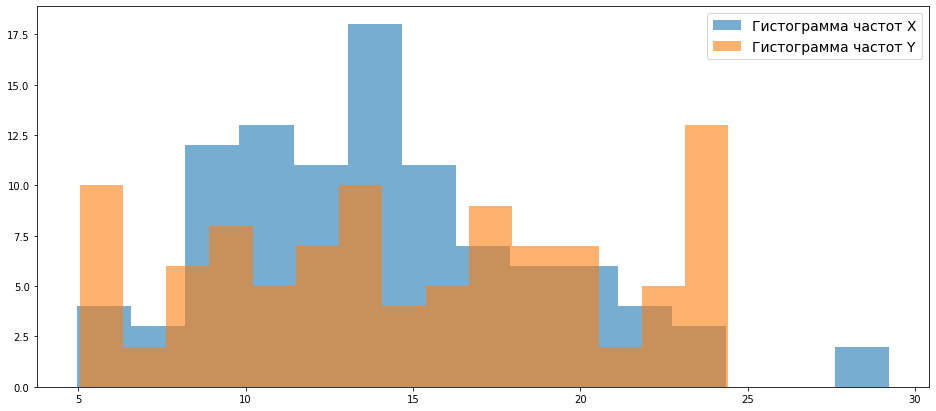

In [162]:
plt.figure(figsize=(16, 7))

plt.hist(x_1,  bins=15, alpha=0.6, label='Гистограмма частот X')
plt.hist(x_2,  bins=15, alpha=0.6, label='Гистограмма частот Y')

plt.legend(fontsize=14, loc=1)

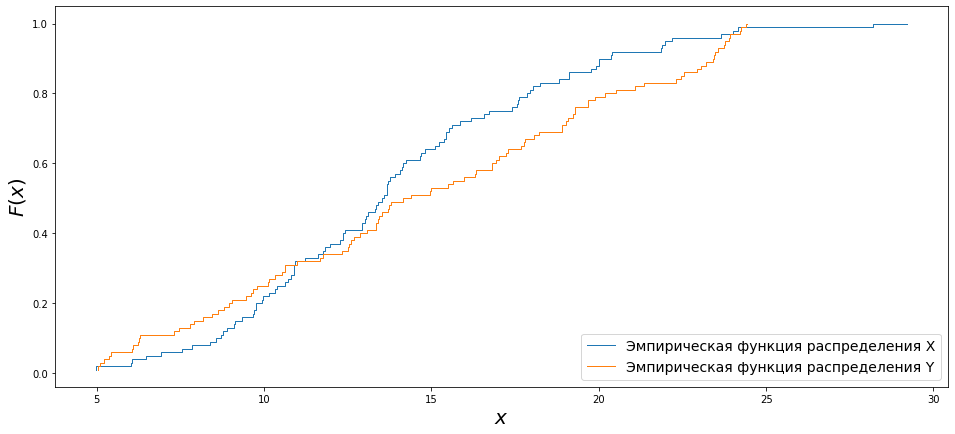

In [163]:
#ЭФР
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize=(16, 7))


ecdfX = ECDF(x_1)  
ecdfY = ECDF(x_2)
plt.step(ecdfX.x, ecdfX.y,lw=1, label='Эмпирическая функция распределения X')
plt.step(ecdfY.x, ecdfY.y,lw=1, label='Эмпирическая функция распределения Y')
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

plt.legend(fontsize=14, loc=4)
plt.show()

Сhi-squared test: z = 68.729, p-value = 0.000


array([10.,  8., 12.,  8., 12.,  7., 11., 12.,  4., 16.])

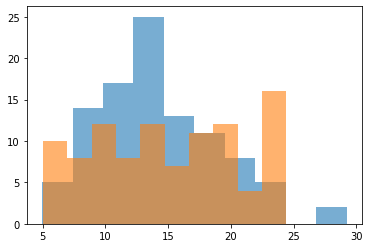

In [164]:
#Chi-squared

result = plt.hist(x_1,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_X = result[0]

result = plt.hist(x_2,  bins=10, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_Y = result[0]

ans = sps.chisquare(f_obs = frequencies_X, f_exp = frequencies_Y)

print('Сhi-squared test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))
frequencies_Y

In [170]:
#KS-test
Z, P = sps.ks_2samp(x_1, x_2)
print('Z:', Z)
print('P-value:', P)

Z: 0.17
P-value: 0.11119526053829192


In [166]:
#Sign test
ans = sign_test(x_1, x_2)
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))


Sign test: z = -7.000, p-value = 0.193


In [167]:
sps.mannwhitneyu(x_1, x_2)

MannwhitneyuResult(statistic=4551.0, pvalue=0.2731400830994096)